In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
# allow plots to appear directly in the notebook
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv',index_col=0)
data.head(100)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
96,163.3,31.6,52.9,16.9
97,197.6,3.5,5.9,11.7
98,184.9,21.0,22.0,15.5
99,289.7,42.3,51.2,25.4


In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.info(verbose=True,memory_usage='deep',null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

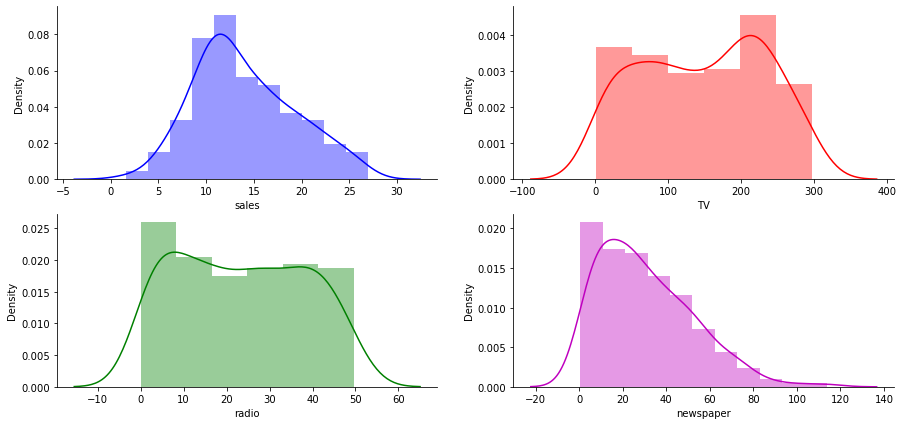

In [8]:
# Distribution of feature
f,axes = plt.subplots(2,2, figsize=(15,7),sharex = False)
sns.despine(left= False)

sns.distplot(data.sales,color='b',ax=axes[0,0],kde = True)
sns.distplot(data.TV,color='r',ax=axes[0,1],kde = True)
sns.distplot(data.radio,color='g',ax=axes[1,0],kde = True)
sns.distplot(data.newspaper,color='m',ax=axes[1,1],kde = True)

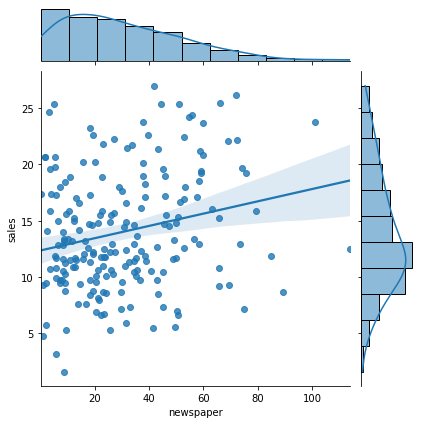

In [9]:
# Is there a relationship between sales and spends on various advertising channels?
JG1 = sns.jointplot('newspaper','sales',data=data,kind = 'reg')

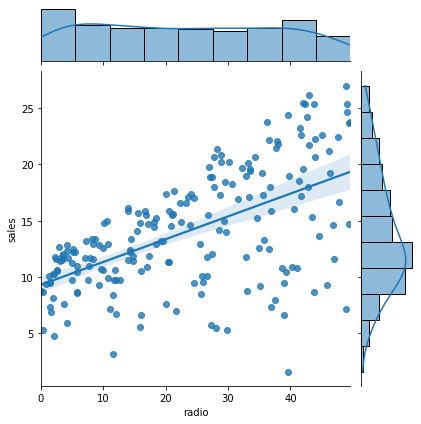

In [10]:
JG2 = sns.jointplot("radio", "sales", data=data, kind='reg')


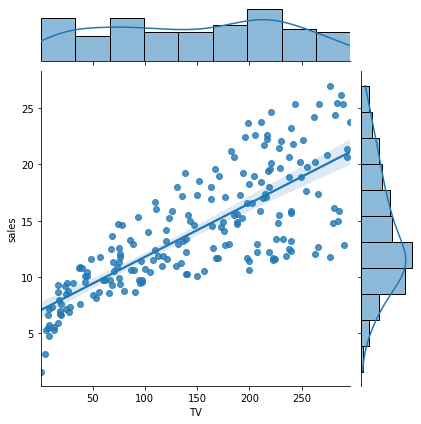

In [11]:
JG3 = sns.jointplot("TV", "sales", data=data, kind='reg')

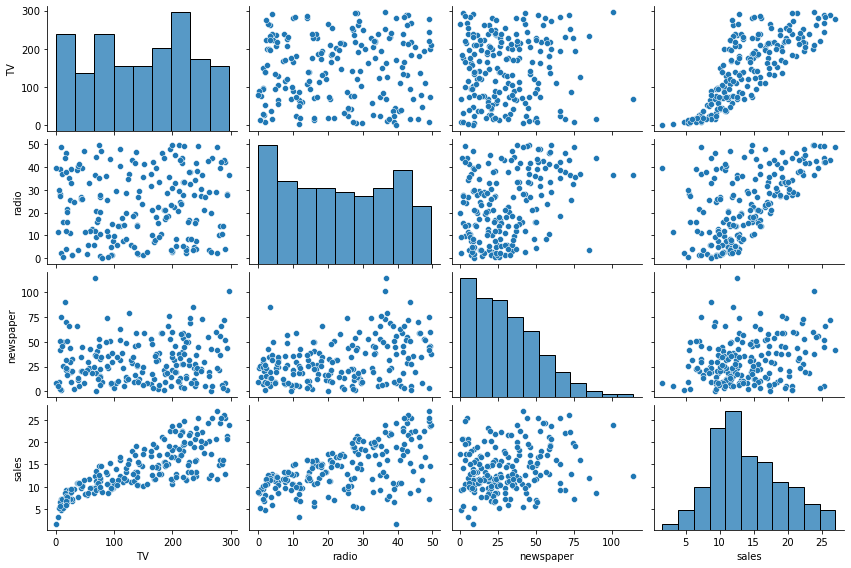

In [12]:
sns.pairplot(data,size=2,aspect=1.5)

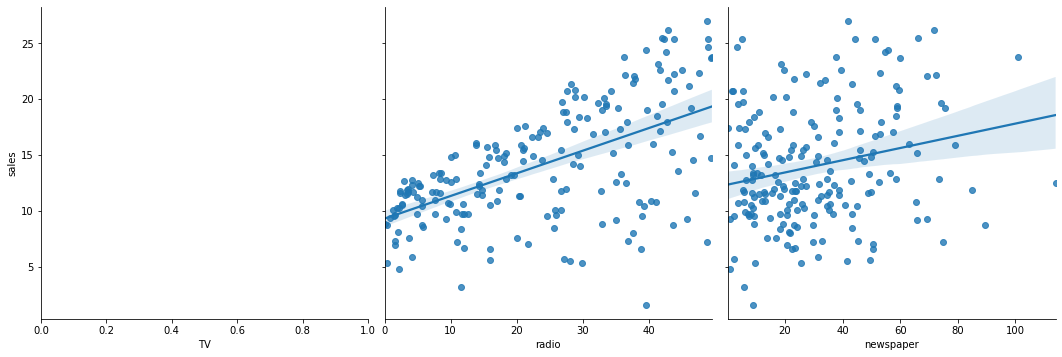

In [13]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars ='sales',size =5,aspect = 1, kind='reg')

In [14]:
round(data.corr(),2)

,TV,radio,newspaper,sales
TV,1.00,0.05,0.06,0.78
radio,0.05,1.00,0.35,0.58
newspaper,0.06,0.35,1.00,0.23
sales,0.78,0.58,0.23,1.00


<AxesSubplot:>

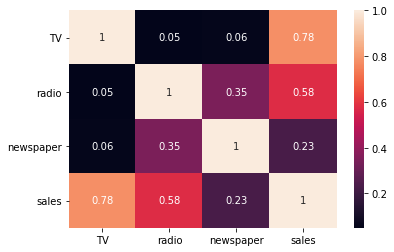

In [15]:
sns.heatmap(round(data.corr(),2),annot=True)

# Training and Testing the model

In [16]:
features = ['TV','radio','newspaper']    # Create a list of feature name
target = ['sales']                       # Define a target variable

In [17]:
data[features].head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [18]:
data[target].head()

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[features],data[target],test_size= 0.20,random_state=0)

In [20]:
print('Train cases as below')
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('\nTest cases as below')
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)

Train cases as below
x_train shape (160, 3)
y_train shape (160, 1)

Test cases as below
x_test shape (40, 3)
y_test shape (40, 1)


In [21]:
x_train.head()

,TV,radio,newspaper
135,36.9,38.6,65.6
67,31.5,24.6,2.2
27,142.9,29.3,12.6
114,209.6,20.6,10.7
169,215.4,23.6,57.6


In [22]:
y_train.head()

,sales
135,10.8
67,9.5
27,15.0
114,15.9
169,17.1


# Applying Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
lr_model= LinearRegression(fit_intercept= True)

In [24]:
%time
lr_model.fit(x_train,y_train);

Wall time: 0 ns


# Y = mx+c
# Interpreting model coefficient

In [25]:
print('Intercept: ',lr_model.intercept_)     # C is intercept
print('coefficient',lr_model.coef_)          # This coefficient of TV,radio,newspaper

Intercept:  [2.99489303]
coefficient [[ 0.04458402  0.19649703 -0.00278146]]


In [26]:
x_train.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [27]:
(lr_model.coef_).T

array([[ 0.04458402],
       [ 0.19649703],
       [-0.00278146]])

In [28]:
pd.DataFrame((lr_model.coef_).T,index=x_train.columns,columns=['co-efficient']).sort_values('co-efficient',ascending = False)

,co-efficient
radio,0.196497
TV,0.044584
newspaper,-0.002781


# y = 2.99 + 0.045*TV +0.197*radio -0.0027*newpaper

# y = c + m1* x1 + m2* x2 + m3*x3

# Using the model for prediction

In [29]:
y_pred_train = lr_model.predict(x_train)

In [30]:
y_pred_train

array([[12.04236485],
       [ 9.22699748],
       [15.08826616],
       [16.35778089],
       [17.07540865],
       [13.36661981],
       [ 3.78817791],
       [12.08662048],
       [15.62955297],
       [ 8.68273227],
       [10.61195362],
       [19.36739522],
       [18.41226024],
       [15.30372386],
       [10.00012405],
       [ 8.19743932],
       [21.49425935],
       [14.15684188],
       [16.3171467 ],
       [ 8.72677043],
       [15.26881361],
       [12.47602439],
       [13.7213733 ],
       [14.20527235],
       [18.32820674],
       [19.11937848],
       [20.32200442],
       [17.49488834],
       [ 9.34748691],
       [11.75581878],
       [19.85996966],
       [ 9.91949478],
       [20.71025022],
       [23.06178922],
       [10.08383292],
       [17.13980942],
       [19.65212394],
       [18.43129662],
       [16.91732121],
       [18.37653406],
       [17.10374151],
       [ 8.84010201],
       [ 9.94425907],
       [ 5.38665742],
       [ 3.58633703],
       [16

In [31]:
y_pred_test = lr_model.predict(x_test)

In [32]:
y_pred_test

array([[10.05739563],
       [ 7.4522807 ],
       [ 7.0197076 ],
       [24.08029725],
       [12.01786259],
       [ 6.53793858],
       [12.78286918],
       [15.10974587],
       [10.76974013],
       [16.34357951],
       [22.88297477],
       [ 9.12924467],
       [10.46455672],
       [15.48743552],
       [11.58555633],
       [12.17296914],
       [18.76551502],
       [10.78318566],
       [15.90515992],
       [17.30651279],
       [24.06692057],
       [ 9.59834224],
       [15.13512211],
       [12.38591525],
       [ 5.71360885],
       [15.24749314],
       [12.29402334],
       [20.9421167 ],
       [13.40991558],
       [ 9.04348832],
       [12.89239415],
       [21.40272028],
       [18.13802209],
       [21.17320803],
       [ 6.56974433],
       [ 6.14114206],
       [ 7.89018394],
       [13.01541434],
       [14.68953791],
       [ 6.18835143]])

# Evaluation of model

# MAE (Mean Absolute Error) or MAPE (Mean absolute percentage error)

In [33]:
from sklearn import metrics

In [34]:
MAE_train = metrics.mean_absolute_error(y_train,y_pred_train)   # Evaluation of model using y train & y pred train

In [35]:
MAE_test = metrics.mean_absolute_error(y_test,y_pred_test)

In [36]:
print('MAE for training set is {}'.format(MAE_train.round(3)))
print('MAE for test set is {}'.format(MAE_test.round(3)))

MAE for training set is 1.213
MAE for test set is 1.362


In [37]:
data['sales'].mean()

14.022500000000003

In [38]:
(MAE_train/data['sales'].mean()).round(3)

0.087

In [39]:
(MAE_test/data['sales'].mean()).round(3)

0.097

# MSE (Mean Squared error)

# $$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [40]:
MSE_train = metrics.mean_squared_error(y_train,y_pred_train)
MSE_test = metrics.mean_squared_error(y_test,y_pred_test)

In [41]:
print('MSE for training set is {}'.format(MSE_train.round(3)))
print('MSE for test set is {}'.format(MSE_test.round(3)))

MSE for training set is 2.407
MSE for test set is 4.402


# RMSE (Root mean squared error)

# $$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [42]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

In [43]:
print('RMSE for training set is {}'.format(RMSE_train.round(3)))
print('RMSE for test set is {}'.format(RMSE_test.round(3)))

RMSE for training set is 1.551
RMSE for test set is 2.098


In [44]:
data['sales'].mean()

14.022500000000003

In [45]:
RMSE_test/data['sales'].mean()

0.14962542795476416

# Model evaluation using R squared 

In [46]:
#r2-score is a standard metric in sklaearn library
r2_train = metrics.r2_score(y_train,y_pred_train)
r2_test = metrics.r2_score(y_test,y_pred_test)

In [47]:
print('R-Squared of train data:',r2_train)
print('R-Squared of test data:',r2_test)

R-Squared of train data: 0.9067114990146383
R-Squared of test data: 0.8601145185017868


# Standardisation of Data

* Standardize  features by removing the mean and scaling to unit standard deviation

##  Know Z 
* Z = x-x_mean/std dev

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
# scaler = StandardScaler().fit(data)
# data1 = scaler.transform()

#  7. Feature Selection
* At some time feature do not contribute much to the accuracy of the model , in that case it's better to discard those feature.
* In this case, let us check newspaper improve the quality of our prediction of not ?

In [50]:
features_2 = ['TV','radio']
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(data[features_2],data[target],test_size=0.20,random_state= 0)
lr_model_2 = LinearRegression()

In [51]:
lr_model_2.fit(x_train_2,y_train_2)

LinearRegression()

In [52]:
print('Intercepts',lr_model_2.intercept_)
print('coefficient',lr_model_2.coef_)

Intercepts [2.95144076]
coefficient [[0.04451639 0.19520741]]


In [53]:
x_train_2.columns

Index(['TV', 'radio'], dtype='object')

In [54]:
pd.DataFrame((lr_model_2.coef_).T,index =x_train_2.columns,columns =['co-efficient']).sort_values('co-efficient',ascending= False)

,co-efficient
radio,0.195207
TV,0.044516


In [55]:
# Make predicton on testing set
y_pred_train_2 = lr_model_2.predict(x_train_2)
y_pred_test_2 = lr_model_2.predict(x_test_2)

In [56]:
RMSE_train_2 = np.sqrt(metrics.mean_squared_error(y_train_2,y_pred_train_2))
RMSE_test_2 = np.sqrt(metrics.mean_squared_error(y_test_2,y_pred_test_2))

In [57]:
print('RMSE for training set {}'.format(RMSE_train_2 ))
print('RMSE for test set {}'.format(RMSE_test_2 ))

RMSE for training set 1.5524010871086755
RMSE for test set 2.0955738506628396


In [91]:
RMSE_test

2.098122563495681

In [58]:
r2_test_2 = metrics.r2_score(y_test_2,y_pred_test_2)

In [59]:
r2_test_2

0.8604541663186569

In [60]:
r2_test

0.8601145185017868

[ After discarding newspaper there is significant change in the model and hence explanatory power is low .]

# 8. Handling Categorical variable
* Let's create a new feature **Area** and randomly assign observation **rural,suburban and urban**

In [61]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [62]:
# Include the variable in tha dataset
np.random.seed(123456)
nums = np.random.rand(len(data))
mark_suburban = (nums>0.33) & (nums<0.66)
mark_urban = (nums>0.66)
data['Area'] = 'rural'
data.loc[mark_suburban,'Area']='suburban'
data.loc[mark_urban,'Area']='urban'

In [63]:
data.tail()

,TV,radio,newspaper,sales,Area
196,38.2,3.7,13.8,7.6,suburban
197,94.2,4.9,8.1,9.7,urban
198,177.0,9.3,6.4,12.8,suburban
199,283.6,42.0,66.2,25.5,rural
200,232.1,8.6,8.7,13.4,rural


# Some EDA of Categorical variable

In [64]:
data.groupby(['Area'])['sales'].mean()

Area
rural       14.130508
suburban    13.612821
urban       14.428571
Name: sales, dtype: float64

In [65]:
data.groupby(['Area'])['sales'].mean().sort_values(ascending = False)

Area
urban       14.428571
rural       14.130508
suburban    13.612821
Name: sales, dtype: float64

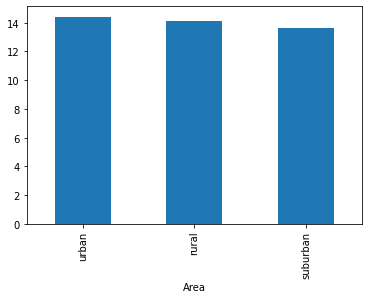

In [66]:
data.groupby(['Area'])['sales'].mean().sort_values(ascending = False).plot(kind='bar');

In [67]:
# count of diffierent area
data.groupby(['Area'])['sales'].count().sort_values(ascending = False)

Area
suburban    78
urban       63
rural       59
Name: sales, dtype: int64

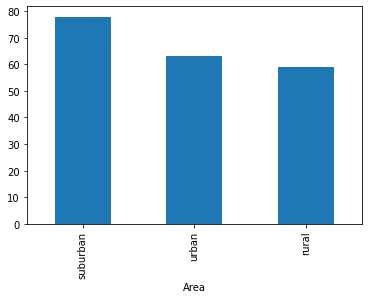

In [68]:
data.groupby(['Area'])['sales'].count().sort_values(ascending = False).plot(kind= 'bar');

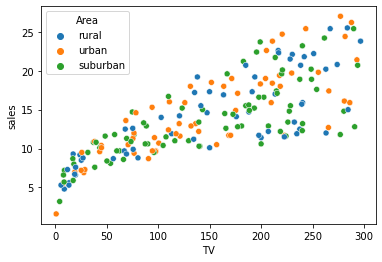

In [69]:
a = sns.scatterplot(x='TV',y='sales',data= data,hue = 'Area')

We want to represent area numerically , we can't simply code it as

    * 0 = rural
    * 1 = suburban
    * 2 = urban

Because it would imply an ordered relationship between suburban and urban and urban is twice the suburban category

### Let's handle this with **one hot encoding**

In [70]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales', 'Area'], dtype='object')

In [71]:
features =['TV', 'radio', 'newspaper','Area']
cat_col = ['Area']

In [72]:
data_with_dummies =pd.get_dummies(data,columns =cat_col,drop_first= True )
data_with_dummies.head()

,TV,radio,newspaper,sales,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,0,0
2,44.5,39.3,45.1,10.4,0,1
3,17.2,45.9,69.3,9.3,0,0
4,151.5,41.3,58.5,18.5,0,1
5,180.8,10.8,58.4,12.9,1,0


In [73]:
data.head()

,TV,radio,newspaper,sales,Area
1,230.1,37.8,69.2,22.1,rural
2,44.5,39.3,45.1,10.4,urban
3,17.2,45.9,69.3,9.3,rural
4,151.5,41.3,58.5,18.5,urban
5,180.8,10.8,58.4,12.9,suburban


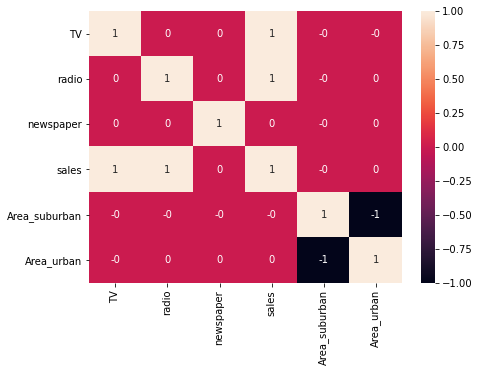

In [74]:
plt.figure(figsize=(7,5))
sns.heatmap(round(data_with_dummies.corr()),annot = True);
plt.show()

In [75]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales', 'Area'], dtype='object')

In [76]:
feature_cols = ['TV', 'radio', 'newspaper','Area_suburban','Area_urban']
x = data_with_dummies[feature_cols]
y = data_with_dummies.sales
lr_model_cat = LinearRegression()

In [77]:
lr_model_cat.fit(x,y);

In [78]:
y_pred_cat = lr_model_cat.predict(x)

In [79]:
x.columns

Index(['TV', 'radio', 'newspaper', 'Area_suburban', 'Area_urban'], dtype='object')

In [80]:
pd.DataFrame((lr_model_cat.coef_).T, index = x.columns,columns=['co-efficient']).sort_values('co-efficient',ascending=False)

,co-efficient
Area_urban,0.253522
radio,0.187617
TV,0.045802
newspaper,-0.001018
Area_suburban,-0.117890


In [81]:
print('Intercept',lr_model_cat.intercept_)

Intercept 2.920124220674438


In [82]:
x.head()

,TV,radio,newspaper,Area_suburban,Area_urban
1,230.1,37.8,69.2,0,0
2,44.5,39.3,45.1,0,1
3,17.2,45.9,69.3,0,0
4,151.5,41.3,58.5,0,1
5,180.8,10.8,58.4,1,0


 ### Y = 2.92 +0.045*TV +0.187*radio -0.001 *newspaper -0.117*Area_suburban +0.253*Area_urban

In [83]:
data_with_dummies['predictions']=y_pred_cat

In [84]:
data_with_dummies.head()

,TV,radio,newspaper,sales,Area_suburban,Area_urban,predictions
1,230.1,37.8,69.2,22.1,0,0,20.480693
2,44.5,39.3,45.1,10.4,0,1,12.539271
3,17.2,45.9,69.3,9.3,0,0,12.248978
4,151.5,41.3,58.5,18.5,0,1,17.801707
5,180.8,10.8,58.4,12.9,1,0,13.050091


In [85]:
data_with_dummies['error']=data_with_dummies['sales']-data_with_dummies['predictions']

In [86]:
data_with_dummies['error'].describe().round(0)

count    200.0
mean      -0.0
std        2.0
min       -9.0
25%       -1.0
50%        0.0
75%        1.0
max        3.0
Name: error, dtype: float64

<AxesSubplot:xlabel='error', ylabel='Density'>

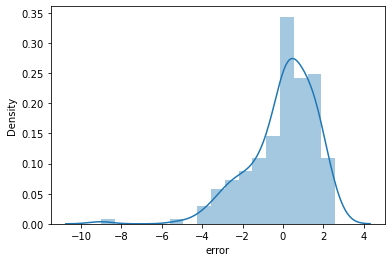

In [87]:
sns.distplot(data_with_dummies['error'])

<AxesSubplot:title={'center':'Error Distribution'}, xlabel='sales', ylabel='error'>

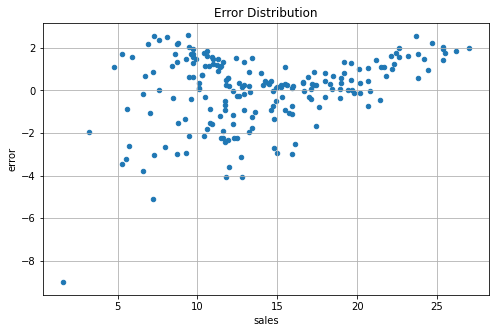

In [88]:
data_with_dummies.plot.scatter(x='sales',y='error',figsize=(8,5),grid = True, title = 'Error Distribution')

<AxesSubplot:title={'center':'Actual vs Predicted'}, xlabel='sales', ylabel='predictions'>

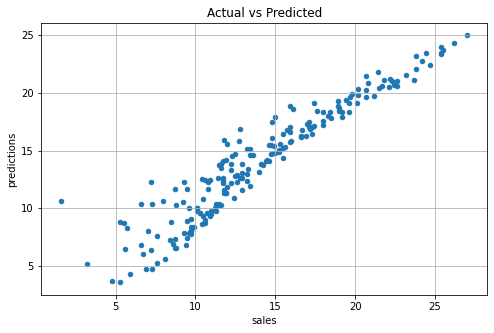

In [89]:
data_with_dummies.plot.scatter(x='sales',y='predictions',figsize=(8,5),grid = True, title = 'Actual vs Predicted')

In [90]:
data_with_dummies.to_csv('data_with_predictions.csv')

# Standardisation  of Data

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [97]:
data1 = scaler.fit_transform(data)

ValueError: could not convert string to float: 'rural'